<a href="https://colab.research.google.com/github/Satyake/Getting-Started-with-TF2/blob/main/ICL_Labs_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 

In [ ]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [ ]:
data

MinMaxScaler()

In [ ]:
data=diabetes['data']
targets=diabetes['target']

In [ ]:
data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
msc=MinMaxScaler()

In [ ]:
data=msc.fit_transform(data)

In [ ]:
targets

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,targets,random_state=0, test_size=0.1)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(397, 10)
(397,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras import regularizers


In [ ]:
def model():
  model=Sequential([
                    Dense(128,activation='relu',input_shape=(x_train.shape[1],)),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(1)])
  return model

In [ ]:
def regularized_model(wd,rate):
    model=Sequential([
                    Dense(128,activation='relu',input_shape=(x_train.shape[1],)),
                    Dense(128, kernel_regularizer=regularizers.L2(wd), activation='relu'),
                    Dropout(rate),
                    BatchNormalization(),
                    Dense(128, kernel_regularizer=regularizers.L2(wd),activation='relu'),
                    Dense(128, kernel_regularizer=regularizers.L2(wd),activation='relu'),
                    Dense(128, kernel_regularizer=regularizers.L2(wd),activation='relu'),
                    Dropout(rate),
                    Dense(128, kernel_regularizer=regularizers.L2(wd), activation='relu'),
                    Dense(128, kernel_regularizer=regularizers.L2(wd),activation='relu'),
                    Dropout(rate),
                    Dense(128, activation='relu'),
                    Dense(1)])
    return model

In [ ]:

model=regularized_model(0.0001,0.2)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 128)               1408      
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_39 (Dense)            (None, 128)               16512     
                                                                 
 dense_40 (Dense)            (None, 128)               16512     
                                                      

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [ ]:
history=model.fit(x_train,y_train, epochs=100,validation_split=0.2,batch_size=12,verbose=False)

In [ ]:
model.evaluate(x_test,y_test,verbose=2)

2/2 - 0s - loss: 5173.7290 - mse: 5173.6484 - 22ms/epoch - 11ms/step


[5173.72900390625, 5173.6484375]

In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 0, 'Epochs')

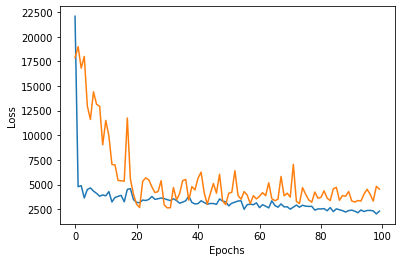

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [ ]:
#Custom Callbacks

In [ ]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_train_begin(self,logs=None):
    print('starting training')

  def on_epoch_begin(self,epoch,logs=None):
    print('Staring Epoch {}'.format(epoch))

  def on_train_batch_begin(self,batch, logs=None):
    print('Training: Starting batch {}'.format(batch))

  def on_train_batch_end(self,batch,logs=None):
    print('Training: Finished batch {}'.format(batch))

  def on_epoch_end(self,epoch,logs=None):
    print('Finished epoch {}'.format(epoch))

  def on_train_end(self,logs=None):
    print('Finished training!')

In [ ]:
from tensorflow.keras.callbacks import Callback

class PredictionCallback(Callback):
  def on_predict_begin(self,logs=None):
    print('starting training')

  def on_epoch_begin(self,epoch,logs=None):
    print('Staring Epoch {}'.format(epoch))

  def on_predict_batch_begin(self,batch, logs=None):
    print('Training: Starting batch {}'.format(batch))

  def on_predict_batch_end(self,batch,logs=None):
    print('Training: Finished batch {}'.format(batch))

  def on_epoch_end(self,epoch,logs=None):
    print('Finished epoch {}'.format(epoch))

  def on_predict_end(self,logs=None):
    print('Finished training!')

In [ ]:
model=regularized_model(0.00001, 0.3)

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.fit(x_train, y_train, epochs=3, batch_size=128, callbacks=[TrainingCallback()])

starting training
Staring Epoch 0
Epoch 1/3
Training: Starting batch 0
Training: Finished batch 0
1/4 [======>.......................] - ETA: 3s - loss: 30253.8398Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
4/4 [==============================] - 1s 8ms/step - loss: 28728.1738
Staring Epoch 1
Epoch 2/3
Training: Starting batch 0
Training: Finished batch 0
1/4 [======>.......................] - ETA: 0s - loss: 27228.6719Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
4/4 [==============================] - 0s 9ms/step - loss: 28272.4180
Staring Epoch 2
Epoch 3/3
Training: Starting batch 0
Training: Finished batch 0
1/4 [======>.......................] - ETA: 0s - loss: 27961.4688Training: Starting batch 1
Training: Finished bat

In [ ]:
model.evaluate(x_test,y_test,verbose=False,callbacks=[TestingCallback()])

Training: Starting batch 0
Training: Starting batch 1


30943.53515625

In [ ]:
model.predict(x_test,verbose=False, callbacks=[PredictionCallback()])

starting training
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Finished training!


array([[3.2079167],
       [2.8422704],
       [3.2272851],
       [2.1964087],
       [2.3575094],
       [2.5065174],
       [2.205443 ],
       [3.3954885],
       [1.9553818],
       [2.3315237],
       [2.1770496],
       [3.4042904],
       [2.9732013],
       [1.701799 ],
       [3.725678 ],
       [2.5834718],
       [1.9689888],
       [2.099556 ],
       [1.5508279],
       [2.9418535],
       [2.971642 ],
       [2.0404425],
       [3.362825 ],
       [1.9057145],
       [3.1886778],
       [2.6608791],
       [2.680948 ],
       [1.9877058],
       [2.374969 ],
       [3.1684055],
       [3.365227 ],
       [1.8915993],
       [1.7700574],
       [2.4194875],
       [3.1586237],
       [2.4718423],
       [2.540669 ],
       [3.628985 ],
       [2.3387027],
       [2.6895862],
       [2.155357 ],
       [3.1366034],
       [2.6917095],
       [2.3787658],
       [3.3535035]], dtype=float32)

In [ ]:
#Early stopping and patience

In [ ]:
unregularized_model=model()
unregularized_model.compile(optimizer='adam',loss='mse')
unreg_history=unregularized_model.fit(x_train,y_train,epochs=100,verbose=True,validation_split=0.15,
                                      callbacks=[tf.keras.callbacks.EarlyStopping(patience=4)])


Epoch 1/100
11/11 [==============================] - 1s 24ms/step - loss: 27983.1504 - val_loss: 30140.4746
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 20716.4238 - val_loss: 6516.4438
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 6292.1631 - val_loss: 7111.8813
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 5381.5996 - val_loss: 5603.1167
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 4598.7441 - val_loss: 5112.9590
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 4035.6772 - val_loss: 4434.4634
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 3893.1355 - val_loss: 4264.1265
Epoch 8/100
11/11 [==============================] - 0s 8ms/step - loss: 3741.7241 - val_loss: 4446.0967
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 3464.2041 - val_loss: 3766.3845
Epoch 10/100
11/11 [==============================]

In [ ]:
unregularized_model.evaluate(x_test,y_test, verbose=2)

2/2 - 0s - loss: 6537.4790 - 22ms/epoch - 11ms/step


6537.47900390625

In [ ]:
regularized_model=regularized_model(0.0001, 0.2)
regularized_model.compile(optimizer='adam',loss='mse')
reg_history=regularized_model.fit(x_train,y_train,epochs=100,verbose=False,validation_split=0.15,
                                      callbacks=[tf.keras.callbacks.EarlyStopping(patience=4)])


In [ ]:
regularized_model.evaluate(x_test,y_test,verbose=2)

2/2 - 0s - loss: 16541.3574 - 29ms/epoch - 14ms/step


16541.357421875

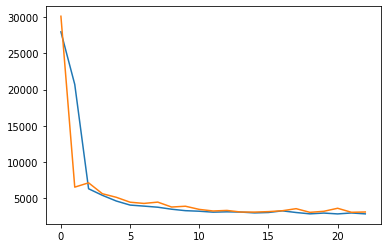

In [ ]:
plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])



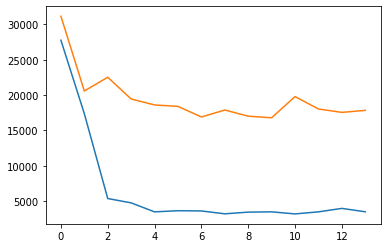

In [ ]:
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])